# 01_EDA – Exploratory Data Analysis

## Project: Cricket Player Performance Prediction (IPL)

### Objective
The purpose of this notebook is to explore and understand the cleaned IPL ball-by-ball dataset.
 analyze data quality, distributions, and basic cricket-related patterns that will guide
feature engineering and model development.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("seaborn-v0_8")


In [38]:
df = pd.read_csv("clean_data.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (260920, 36)


C:\Users\RAKESH\AppData\Local\Temp\ipykernel_25000\3749835067.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clean_data.csv")


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,year,month,day
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18


In [39]:
#Dataset Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       260920 non-null  object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  260920 non-null  object 
 15  dismissal_kind    260920 non-null  object 
 16  fielder           26

In [40]:
#Missing Values Check
df.isna().sum()
#These columns are not required for player performance prediction

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batter                 0
bowler                 0
non_striker            0
batsman_runs           0
extra_runs             0
total_runs             0
extras_type            0
is_wicket              0
player_dismissed       0
dismissal_kind         0
fielder                0
id                     0
season                 0
date                   0
match_type             0
player_of_match      490
venue                  0
team1                  0
team2                  0
toss_winner            0
toss_decision          0
winner               490
result                 0
result_margin       4124
target_runs          309
target_overs         309
super_over             0
year                   0
month                  0
day                    0
dtype: int64

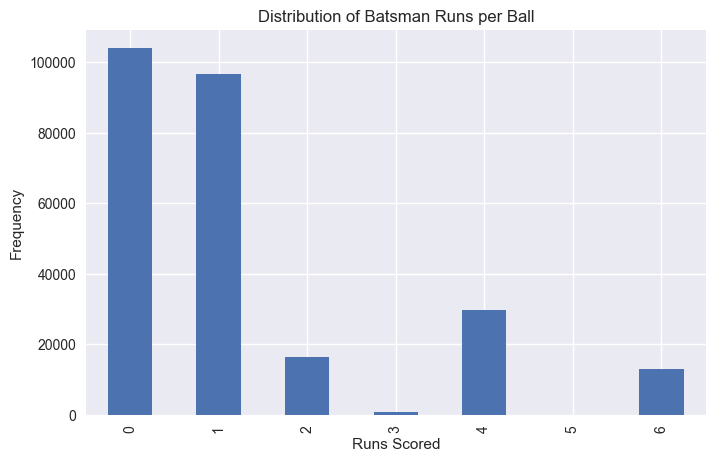

In [41]:
#Runs per Ball Distribution
plt.figure(figsize=(8,5))
df["batsman_runs"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Batsman Runs per Ball")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()


0 and 1 runs are most common

 4, 6 are less frequent

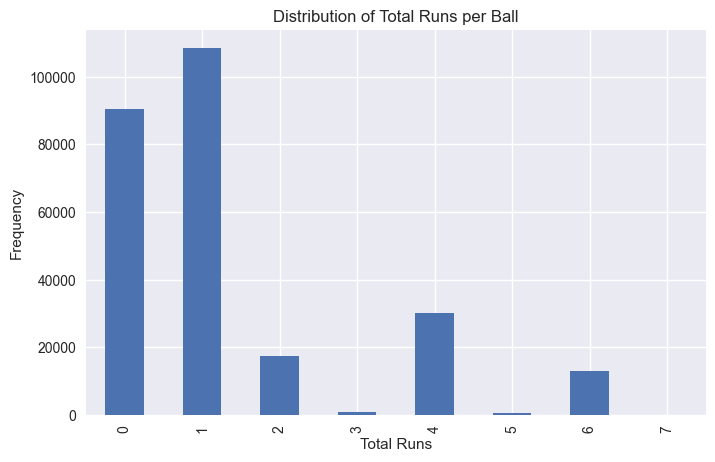

In [42]:
#Total Runs per Ball (Including Extras)
plt.figure(figsize=(8,5))
df["total_runs"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Total Runs per Ball")
plt.xlabel("Total Runs")
plt.ylabel("Frequency")
plt.show()



#Extras increase total run distribution

#Confirms importance of separating batsman_runs vs total_runs

In [43]:
#Wicket Distribution
df["is_wicket"].value_counts()


is_wicket
0    247970
1     12950
Name: count, dtype: int64

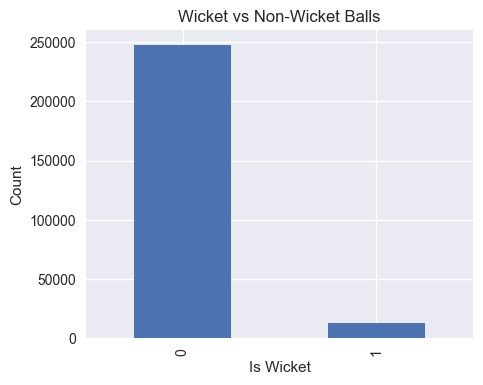

In [44]:
plt.figure(figsize=(5,4))
df["is_wicket"].value_counts().plot(kind="bar")
plt.title("Wicket vs Non-Wicket Balls")
plt.xlabel("Is Wicket")
plt.ylabel("Count")
plt.show()



#Wickets are rare events

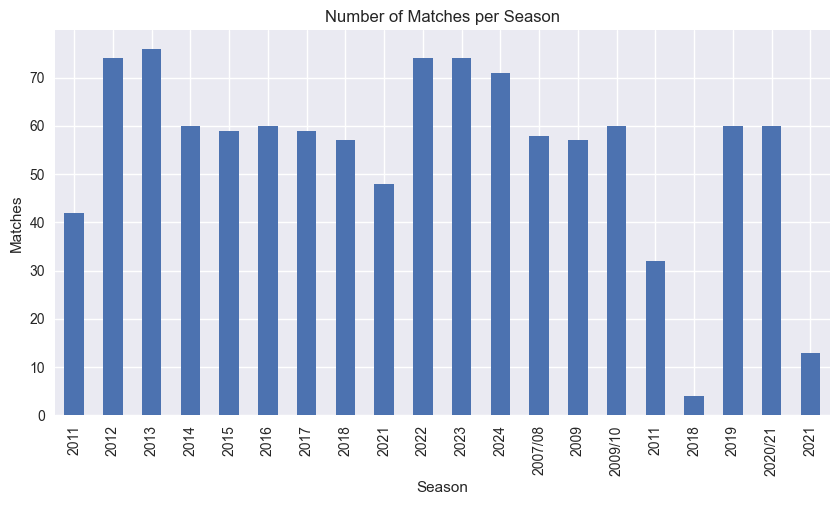

In [45]:
#Matches per Season
matches_per_season = df.groupby("season")["match_id"].nunique()

plt.figure(figsize=(10,5))
matches_per_season.plot(kind="bar")
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()


IPL expansion visible

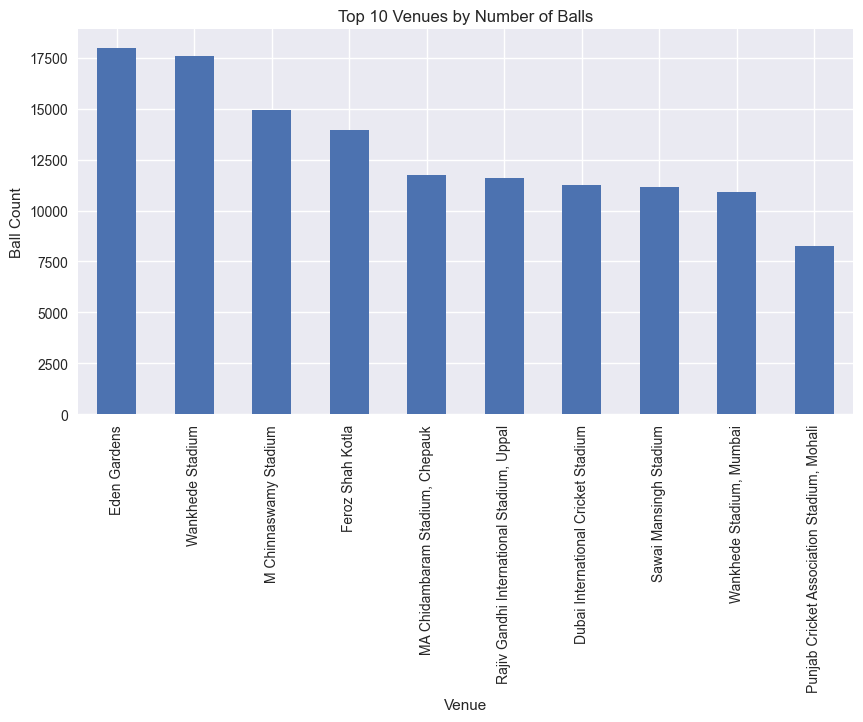

In [46]:
#Top Venues by Ball Count
top_venues = df["venue"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_venues.plot(kind="bar")
plt.title("Top 10 Venues by Number of Balls")
plt.xlabel("Venue")
plt.ylabel("Ball Count")
plt.show()


Certain venues dominate IPL matches

Venue-based (stadium) features will be useful

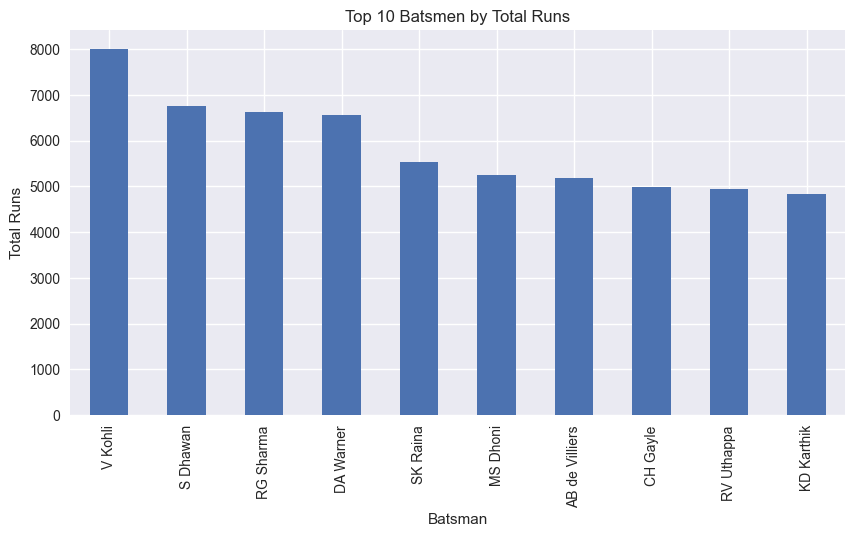

In [47]:
#Top Batsmen by Total Runs
top_batsmen = df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind="bar")
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.show()


Shows long term consistency players

In [48]:

# Top 10 bowlers by total wickets
top_wicket_takers = (
    df[df["is_wicket"] == 1]
    .groupby("bowler")["is_wicket"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

top_wicket_takers


bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64

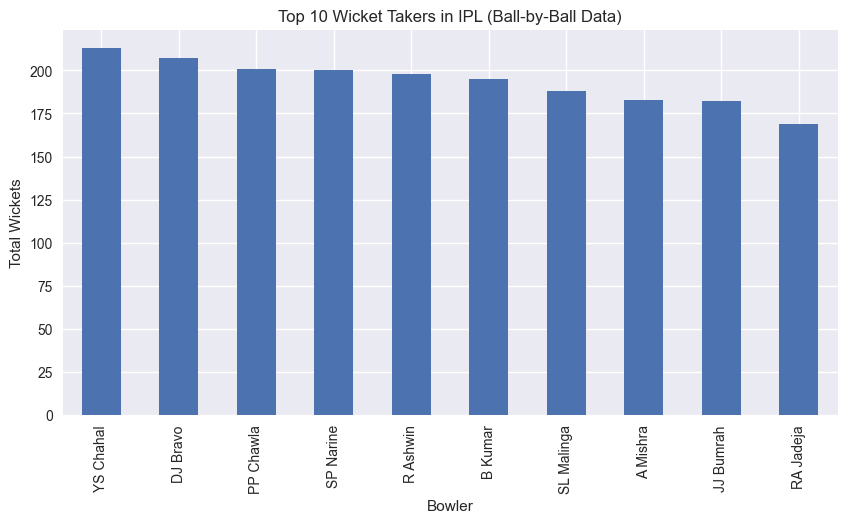

In [49]:
plt.figure(figsize=(10,5))
top_wicket_takers.plot(kind="bar")
plt.title("Top 10 Wicket Takers in IPL (Ball-by-Ball Data)")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.show()


Top Wicket Takers Analysis

In [50]:
# Count different types of dismissals
wicket_types = (
    df[df["is_wicket"] == 1]
    ["dismissal_kind"]
    .value_counts()
)

wicket_types


dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

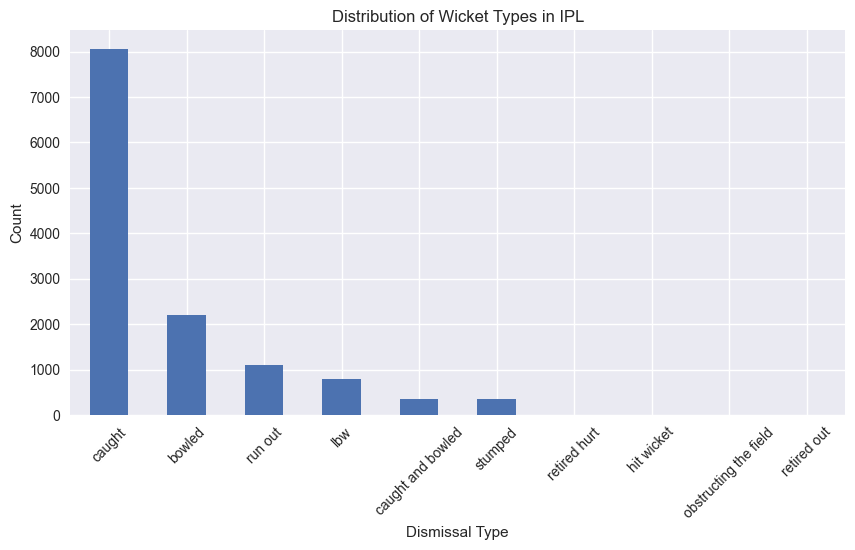

In [51]:
#Types of Wickets
plt.figure(figsize=(10,5))
wicket_types.plot(kind="bar")
plt.title("Distribution of Wicket Types in IPL")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The distribution shows that caught and bowled dismissals are the most common
Certain dismissal types such as run out are not credited to bowlers.
This will be handled during feature engineering when calculating bowler wickets

In [52]:
bowler_match_wickets["wickets"].describe()


count    7778.000000
mean        1.664952
std         0.872248
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: wickets, dtype: float64

In [53]:
# All bowler-match combinations (including 0 wickets)
all_bowler_matches = (
    df.groupby(["match_id", "bowler"])["is_wicket"]
    .sum()
    .reset_index(name="wickets")
)

all_bowler_matches["wickets"].describe()


count    12978.000000
mean         0.997843
std          1.059090
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: wickets, dtype: float64

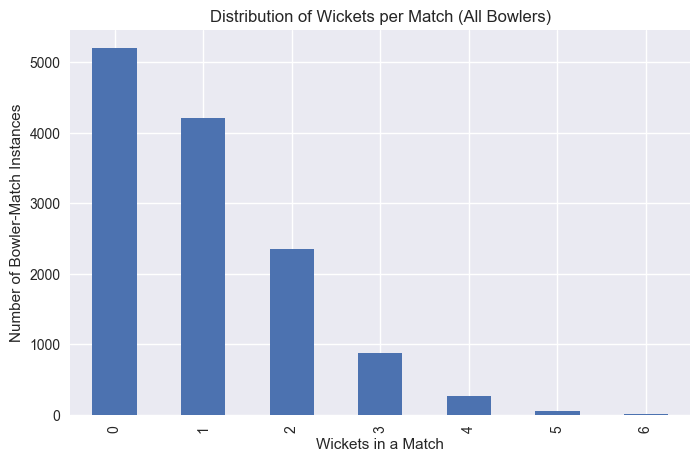

In [54]:
plt.figure(figsize=(8,5))
all_bowler_matches["wickets"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Wickets per Match (All Bowlers)")
plt.xlabel("Wickets in a Match")
plt.ylabel("Number of Bowler-Match Instances")
plt.show()



This analysis includes all bowler–match combinations, including matches where
a bowler took zero wickets. Most bowlers take between 0 to 2 wickets per match,
which is typical for T20 cricket. High wicket hauls (4 or more wickets) are
relatively rare and represent impactful performances

In [55]:
# Matches played at each venue
venue_match_count = venue_match_runs.groupby("venue")["match_id"].count()

# Average runs per venue
venue_avg_runs = venue_match_runs.groupby("venue")["total_runs"].mean()

# Combine
venue_summary = pd.DataFrame({
    "avg_runs": venue_avg_runs,
    "matches": venue_match_count
})

# Keep venues with at least 10 matches
venue_summary = venue_summary[venue_summary["matches"] >= 10]

# Top 10 high scoring venues
venue_summary.sort_values("avg_runs", ascending=False).head(10)


,avg_runs,matches
venue,,
"Arun Jaitley Stadium, Delhi",380.687500,16
"Eden Gardens, Kolkata",380.312500,16
"M Chinnaswamy Stadium, Bengaluru",380.142857,14
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",364.846154,13
Brabourne Stadium,348.100000,10
Punjab Cricket Association IS Bindra Stadium,347.600000,10
"Wankhede Stadium, Mumbai",346.377778,45
"Brabourne Stadium, Mumbai",342.588235,17
"Sawai Mansingh Stadium, Jaipur",342.100000,10


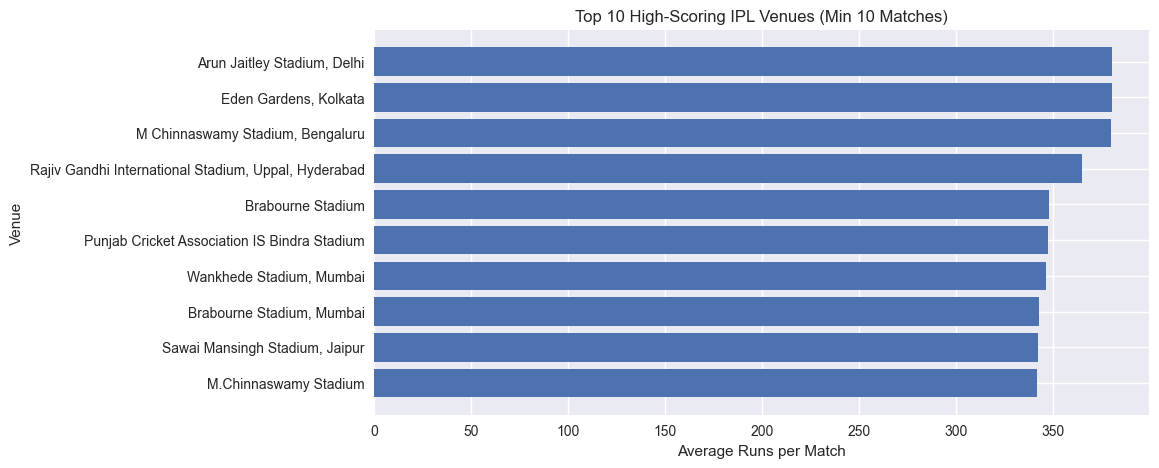

In [56]:
top_venues = venue_summary.sort_values("avg_runs", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_venues.index, top_venues["avg_runs"])
plt.xlabel("Average Runs per Match")
plt.ylabel("Venue")
plt.title("Top 10 High-Scoring IPL Venues (Min 10 Matches)")
plt.gca().invert_yaxis()
plt.show()


High-Scoring Venues Analysis

The analysis shows average total runs per match (both innings combined)